# Example for Running MACE

In [1]:
import numpy as np
import mace

In [2]:
# we have some data in the tests/data/ folder that corresponds to this
# it is the fermi surface of NiAl computed from DFT, but it has a thickness to it (not a well defined surface)

data = np.loadtxt("nial_fs.csv", delimiter=',')
fermi_surface_points = data[:,:3]

## Running MACE

In [12]:
# settings for mace
initial_temp = 10000
alpha = 0.95
min_temp = 1
max_iterations = 1000

# Instantiate
optimizer = mace.MeshOptimizer(reference_points, initial_temp, alpha, min_temp, max_iterations)
new_points = optimizer.simulated_annealing(initial_configuration=optimizer.get_bounding_box_points(15,15,15))

File moved to: sa_configurations_3.ndjson
0 -26.599722601253006
10 -9.128856611616385
20 -3.144666415078156
30 -1.0968169882161636
40 -0.3824364365263877
50 -0.1333473401254277
60 -0.04649534254640603
70 -0.01621192351102943
80 -0.005652748200833696
90 -0.001970991424953085
100 -0.0006872422155108368
110 -0.0002396265436747035
120 -8.355260945852941e-05
130 -2.9132993518982163e-05
140 -9.217616877278781e-06
150 -3.0228192111358704e-06
160 -1.1407483882885754e-06
170 -4.0521466853429166e-07


## Plotting

This will make a small widget that shows you how the points snap to the fermi surface, slowly starting to ressemble the real surface given by points

In [14]:
%matplotlib notebook

<IPython.core.display.Javascript object>


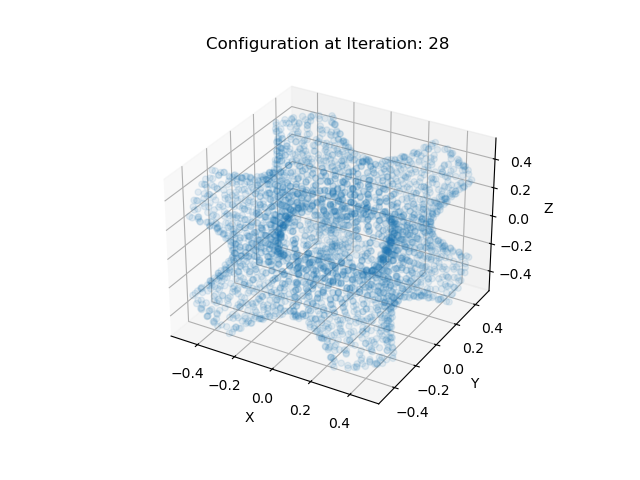

interactive(children=(IntSlider(value=0, continuous_update=False, description='Iteration: Temperature', max=17…

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import ipywidgets as widgets
from IPython.display import display
import json

file_path = 'sa_configurations.ndjson'  # Update this to your file path
configurations = optimizer.load_configurations(file_path)

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Assuming `configurations` is your list of configurations loaded from the file

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

def plot_configuration_at_index(index=0):
    # Clear the previous figure
    ax.clear()
    
    # Plot the current configuration
    configuration = configurations[index]
    ax.scatter(configuration[:, 0], configuration[:, 1], configuration[:, 2], alpha=.1)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Configuration at Iteration: {index}')
    ax.grid(True)

# Create a slider
slider = widgets.IntSlider(
    value=0,
    min=0,
    max=len(configurations) - 1,
    step=1,
    description='Iteration: Temperature',
    continuous_update=False
)

# Plot the initial configuration
plot_configuration_at_index()
# Display the slider and plot
widgets.interactive(plot_configuration_at_index, index=slider)